In [1]:
from brainmri.dataset.stacker import MriStacker
from brainmri.dataset.dataset import *
from brainmri.runner.train import train_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import segmentation_models_pytorch as smp

In [2]:
config = {
     'make_stacks': True,
     'stack_size': 3,
     'data_dir': './data/lgg-mri-segmentation/kaggle_3m/',
     'out_dir': './data/lgg-mri-segmentation/2.5D/StackSize=3',
     'model_out_pth': './models/unet-resnext50_aug_{date}.pth',
     'augmentations': True,
     'epochs': 75,
     'batch_size': 64,
     'lr': 5e-05,
     'optimizer': 'adam',
     'model': 'unet',
     'model_encoder': 'resnext50_32x4d',
     'model_act': 'sigmoid',
     'encoder_weights': 'imagenet',
     'device': 'cuda',
     'num_classes': 1
}

In [3]:
stacker = MriStacker(root_dir=config.get("data_dir"),
                         out_dir=config.get("out_dir"),
                         stack_size=config.get("stack_size"))

if config.get("make_stacks"):
    stacker.process_patients()

stacker.gen_train_val_test_split()


preprocessing_fn = get_preprocessing_fn(config.get("model_encoder"), config.get("encoder_weights"))
train_ds = BrainMriSegmentation(stacker.train_df, config.get("stack_size"),
                                transforms=get_augmentations(is_train=True, apply_transforms=config.get("augmentations")),
                                preprocessing=get_preprocessing(preprocessing_fn))
valid_ds = BrainMriSegmentation(stacker.valid_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))

train_dl = get_dataloader(train_ds, bs=config.get("batch_size"))
valid_dl = get_dataloader(valid_ds, bs=config.get("batch_size"))

train_loss, val_loss, train_fscore, val_fscore, train_iou, val_iou  = train_model(config, train_dl, valid_dl)


/home/nlittlefield/.local/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1741: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  warnings.warn('Using lambda is incompatible with multiprocessing. '


Training unet w/ resnext50_32x4d backbone
Let's use 2 GPUs!

Epoch: 0
valid: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s, dice_loss - 0.9411, iou_score - 0.05451, fscore - 0.1032]
Model saved!

Epoch: 1
valid: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s, dice_loss - 0.9367, iou_score - 0.08677, fscore - 0.1589]
Model saved!

Epoch: 2
valid: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s, dice_loss - 0.9195, iou_score - 0.1837, fscore - 0.3093]
Model saved!

Epoch: 3
valid: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s, dice_loss - 0.9095, iou_score - 0.2513, fscore - 0.4009]
Model saved!

Epoch: 4
valid: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s, dice_loss - 0.8883, iou_score - 0.3224, fscore - 0.4869]
Model saved!

Epoch: 5
valid: 100%|██████████| 10/10 [00:02<00:00,  3.85it/s, dice_loss - 0.8903, iou_score - 0.3634, fscore - 0.532]
Model saved!

Epoch: 6
valid: 100%|██████████| 10/10 [00:02<00:00,  3.94it/s, dice_loss - 0.866, iou_score - 0.5014, fscore - 0.6664]
Model sa

valid: 100%|██████████| 10/10 [00:02<00:00,  3.80it/s, dice_loss - 0.2636, iou_score - 0.7967, fscore - 0.8862]
Model saved!

Epoch: 34
valid: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s, dice_loss - 0.2748, iou_score - 0.7726, fscore - 0.8709]

Epoch: 35
valid: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s, dice_loss - 0.2561, iou_score - 0.7905, fscore - 0.8828]

Epoch: 36
valid: 100%|██████████| 10/10 [00:02<00:00,  3.77it/s, dice_loss - 0.2555, iou_score - 0.7631, fscore - 0.8621]

Epoch: 37
valid: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s, dice_loss - 0.2292, iou_score - 0.7896, fscore - 0.8822]

Epoch: 38
valid: 100%|██████████| 10/10 [00:02<00:00,  3.94it/s, dice_loss - 0.2277, iou_score - 0.7771, fscore - 0.8738]

Epoch: 39
valid: 100%|██████████| 10/10 [00:02<00:00,  3.89it/s, dice_loss - 0.2178, iou_score - 0.7747, fscore - 0.8722]

Epoch: 40
valid: 100%|██████████| 10/10 [00:02<00:00,  3.76it/s, dice_loss - 0.2069, iou_score - 0.8056, fscore - 0.8921]
Model saved!



valid: 100%|██████████| 10/10 [00:02<00:00,  3.95it/s, dice_loss - 0.1297, iou_score - 0.8174, fscore - 0.8994]

Epoch: 68
valid: 100%|██████████| 10/10 [00:02<00:00,  3.94it/s, dice_loss - 0.1303, iou_score - 0.8166, fscore - 0.8986]

Epoch: 69
valid: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s, dice_loss - 0.1354, iou_score - 0.81, fscore - 0.8946] 

Epoch: 70
valid: 100%|██████████| 10/10 [00:02<00:00,  3.87it/s, dice_loss - 0.1265, iou_score - 0.8173, fscore - 0.8993]

Epoch: 71
valid: 100%|██████████| 10/10 [00:02<00:00,  3.99it/s, dice_loss - 0.1239, iou_score - 0.824, fscore - 0.9032]
Model saved!

Epoch: 72
valid: 100%|██████████| 10/10 [00:02<00:00,  3.84it/s, dice_loss - 0.1219, iou_score - 0.826, fscore - 0.9046]
Model saved!

Epoch: 73
valid: 100%|██████████| 10/10 [00:02<00:00,  3.80it/s, dice_loss - 0.1418, iou_score - 0.7999, fscore - 0.8861]

Epoch: 74
valid: 100%|██████████| 10/10 [00:02<00:00,  3.82it/s, dice_loss - 0.1218, iou_score - 0.8215, fscore - 0.9018]


In [4]:
import torch.nn
best_model = torch.load("./models/unet-resnext50_aug_2021-08-23.pth")

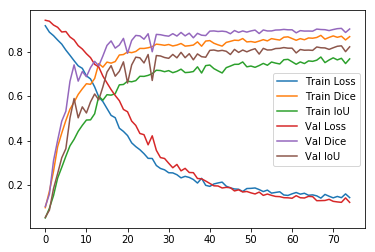

In [5]:
plt.plot(train_loss)
plt.plot(train_fscore)
plt.plot(train_iou)
plt.plot(val_loss)
plt.plot(val_fscore)
plt.plot(val_iou)                                                                                

plt.legend(["Train Loss",  "Train Dice", "Train IoU", "Val Loss", "Val Dice", "Val IoU"])

In [6]:
test_ds = BrainMriSegmentation(stacker.test_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=config.get("batch_size"))

In [7]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU(threshold=0.5), smp.utils.metrics.Fscore(threshold=0.5)]
    
test_epoch =  smp.utils.train.ValidEpoch(
    best_model,
    loss=loss,
    metrics=metrics,
    device=config.get("device"),
    verbose=True
)

In [11]:
test_epoch.run(test_dl)

valid: 100%|██████████| 6/6 [00:01<00:00,  4.38it/s, dice_loss - 0.1251, iou_score - 0.8101, fscore - 0.8949]


{'dice_loss': 0.12509503960609436,
 'iou_score': 0.8100723028182983,
 'fscore': 0.8948517143726349}